In [2]:
from pathlib import Path


def read_log(logpath):
    loss = []
    acc = []
    losses = []
    for line in Path(logpath).read_text().split("\n"):
        if "Train losses: tensor(" in line:
            losses.append(eval(line.split("Train losses: tensor(")[1][:-1].split(", dev")[0]))
        if "Train accuracy: " in line:
            loss.append(float(line.split("Train loss: ")[1].split("\t")[0]))
            acc.append(float(line.split("Train accuracy: ")[1]))
            if loss[-1]<4:
                loss[-1]*=2
    return loss, acc

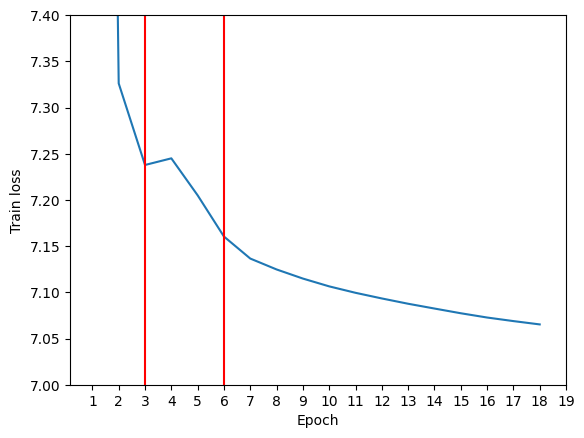

In [3]:
import matplotlib.pyplot as plt

loss, _ = read_log("../../checkpoints/kd_pretrain/tinybert/corpus_pretraining/log")
epoch = [i/64 for i in range(len(loss))]
loss_per_epoch = [sum(loss[i:i+64])/64 for i in range(0,len(loss),64)]
plt.plot(list(range(1,19)), loss_per_epoch)
plt.ylim([7,7.4])
plt.vlines([3,6],0,10,colors="r")
plt.xticks(range(1,20))
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.show()

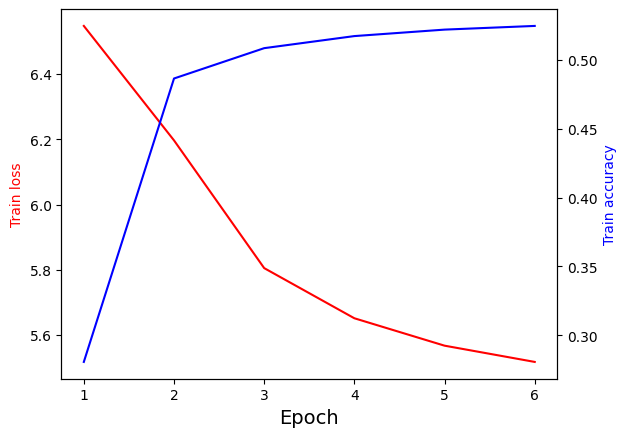

In [7]:

loss, acc = read_log("../../checkpoints/pretrain/tinybert/corpus_pretraining_fixed/log")
epoch = [i/64 for i in range(len(loss))]
loss_per_epoch = [sum(loss[i:i+64])/64 for i in range(0,len(loss),64)]
acc_per_epoch = [sum(acc[i:i+64])/64 for i in range(0,len(loss),64)]

fig,ax = plt.subplots()
ax.set_xlabel("Epoch", fontsize = 14)
plt.xticks(range(1,7))
ax.set_ylabel("Train loss",
              color="red")
ax.plot(list(range(1,7)), loss_per_epoch,color="red")
ax2 = ax.twinx()
ax2.set_ylabel("Train accuracy",
              color="blue")
ax2.plot(list(range(1,7)), acc_per_epoch,color="blue")
#plt.ylim([5.5,6.5])
#plt.vlines([3,6],0,10,colors="r")
plt.show()

In [6]:
acc_per_epoch

[0.280625885325501,
 0.48661757674610845,
 0.5086668819143468,
 0.5174447360936584,
 0.5221447877023807,
 0.5248293588275323]